# MODEL

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import csv

In [3]:
cur_path = '/Users/sonalichaudhari/Desktop/ADS_Project/Data'

In [4]:
d1 = pd.read_csv(cur_path+'/Data2016.csv', low_memory=False)
d2 = pd.read_csv(cur_path+'/Data2017.csv', low_memory=False)

df = pd.concat([d1,d2])

In [5]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'UniqueCarrier', 'AirlineID', 'TailNum', 'FlightNum', 'OriginAirportID',
       'Origin', 'Dest', 'CRSDepTime', 'DepTime', 'DepDelayMinutes',
       'DepDel15', 'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15',
       'CRSElapsedTime', 'ActualElapsedTime', 'DestAirportID',
       'OriginCityName', 'OriginState', 'OriginStateName', 'DestCityName',
       'DestState', 'DestStateName', 'Cancelled', 'Status'],
      dtype='object')

In [6]:
df.shape

(9731742, 32)

In [7]:
# del df['DestState']
# del df['OriginState']
# del df['FlightDate']

### Cross Validation for splitting the data in train and test sets

In [8]:
c = ['Year','Quarter','Month','DayofMonth','DayOfWeek','UniqueCarrier','AirlineID','TailNum','FlightNum','OriginAirportID','Origin','Dest','CRSDepTime','DepTime','DepDelayMinutes','DepDel15','CRSArrTime','ArrTime','ArrDelayMinutes','ArrDel15','CRSElapsedTime','ActualElapsedTime','DestAirportID','OriginCityName','OriginStateName','DestCityName','DestStateName']

In [9]:
len(c)

27

In [10]:
X= df[c]

In [11]:
y = df['Status']

In [12]:
# import statsmodels.api as sm
# from statsmodels.formula.api import logit, probit, poisson, ols
# logit = sm.Logit(df['Status'], df[c])
# mod = logit.fit()
# print(mod.summary())

In [13]:
np.asarray(df)

array([[2016, 1, 1, ..., 'Michigan', 0.0, 0],
       [2016, 1, 1, ..., 'Michigan', 0.0, 0],
       [2016, 1, 1, ..., 'Michigan', 0.0, 0],
       ..., 
       [2017, 3, 9, ..., 'Florida', 0.0, 0],
       [2017, 3, 9, ..., 'Florida', 0.0, 0],
       [2017, 3, 9, ..., 'Massachusetts', 0.0, 0]], dtype=object)

In [14]:
X.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'AirlineID', 'TailNum', 'FlightNum', 'OriginAirportID', 'Origin',
       'Dest', 'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15',
       'CRSArrTime', 'ArrTime', 'ArrDelayMinutes', 'ArrDel15',
       'CRSElapsedTime', 'ActualElapsedTime', 'DestAirportID',
       'OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName'],
      dtype='object')

In [15]:
from sklearn import preprocessing, cross_validation

y = np.ravel(y)
# Splitting the data
X_train, X_test, y_train, y_test =  cross_validation.train_test_split(X, y,test_size=0.30)

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
X.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
UniqueCarrier         object
AirlineID              int64
TailNum               object
FlightNum              int64
OriginAirportID        int64
Origin                object
Dest                  object
CRSDepTime             int64
DepTime              float64
DepDelayMinutes      float64
DepDel15             float64
CRSArrTime             int64
ArrTime              float64
ArrDelayMinutes      float64
ArrDel15             float64
CRSElapsedTime       float64
ActualElapsedTime    float64
DestAirportID          int64
OriginCityName        object
OriginStateName       object
DestCityName          object
DestStateName         object
dtype: object

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
# Converting the categorical data to numeric 
X_train['carrier'] = label_encoder.fit_transform(X_train['UniqueCarrier'])
X_train['tailnum'] = label_encoder.fit_transform(X_train['TailNum'])
X_train['origin'] = label_encoder.fit_transform(X_train['Origin'])
X_train['dest'] = label_encoder.fit_transform(X_train['Dest'])
X_train['ori_city'] = label_encoder.fit_transform(X_train['OriginCityName'])
X_train['ori_state'] = label_encoder.fit_transform(X_train['OriginStateName'])
X_train['dest_city'] = label_encoder.fit_transform(X_train['DestCityName'])
X_train['dest_state'] = label_encoder.fit_transform(X_train['DestStateName'])

X_test['carrier'] = label_encoder.fit_transform(X_test['UniqueCarrier'])
X_test['tailnum'] = label_encoder.fit_transform(X_test['TailNum'])
X_test['origin'] = label_encoder.fit_transform(X_test['Origin'])
X_test['dest'] = label_encoder.fit_transform(X_test['Dest'])
X_test['ori_city'] = label_encoder.fit_transform(X_test['OriginCityName'])
X_test['ori_state'] = label_encoder.fit_transform(X_test['OriginStateName'])
X_test['dest_city'] = label_encoder.fit_transform(X_test['DestCityName'])
X_test['dest_state'] = label_encoder.fit_transform(X_test['DestStateName'])

In [ ]:
# def convert_to_binary(df, column_to_convert):
#     categories = list(df[column_to_convert].drop_duplicates())

#     for category in categories:
#         cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
#         col_name = column_to_convert[:5] + '_' + cat_name[:10]
#         df[col_name] = 0
#         df.loc[(df[column_to_convert] == category), col_name] = 1

#     return df
# # One Hot Encoding

# print("One Hot Encoding categorical data...")
# columns_to_convert = ['UniqueCarrier','TailNum', 'Origin', 'Dest', 'OriginCityName', 'OriginStateName', 'DestCityName', 'DestStateName']

# for column in columns_to_convert:
#     df_all = convert_to_binary(df, column_to_convert=columns_to_convert)
#     df_all.drop(column, axis=1, inplace=True)

In [18]:
X_train = X_train._get_numeric_data()
X_test = X_test._get_numeric_data()

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)
model = model.fit(X_train, y_train)

In [25]:
accuracy = model.score(X_train, y_train)
print(accuracy)

0.977195242842


In [26]:
# Run the model on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1])

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2252017   26581]
 [  39689  601236]]


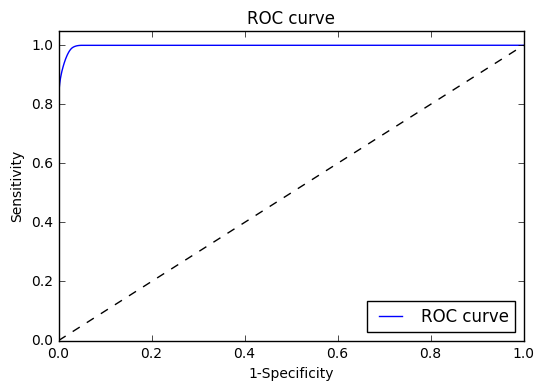

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

preds = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, preds)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()